In [1]:
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import time
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pytz
from pylab import mpl, plt

In [2]:
if not mt5.initialize():
    print('initialize() falhou')
    mt5.shutdown()

In [58]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [4]:
ativo_analise = 'WDOH22'
df_analise = mt5.copy_ticks_from(ativo_analise, datetime(2022, 2, 2),1000000000, mt5.COPY_TICKS_ALL)
df_analise = pd.DataFrame(df_analise)
df_analise['time'] = pd.to_datetime(df_analise['time'], unit='s')
df_analise.drop(['flags', 'time_msc', 'volume_real'], axis = 1, inplace=True)
df_analise.set_index('time', inplace=True)
df_analise['IFR5'] = ta.rsi(df_analise['last'], length=5)
df_analise['IFR9'] = ta.rsi(df_analise['last'], length=9)
df_analise['IFR14'] = ta.rsi(df_analise['last'], length=14)
df_analise

,bid,ask,last,volume,IFR5,IFR9,IFR14
time,,,,,,,
2022-02-02 07:00:03,0.0,0.0,0.0,0,NaN,NaN,NaN
2022-02-02 08:55:00,5301.5,5301.5,0.0,0,NaN,NaN,NaN
2022-02-02 08:55:00,5301.5,5286.5,0.0,0,NaN,NaN,NaN
2022-02-02 08:55:04,5360.0,5286.5,0.0,0,NaN,NaN,NaN
2022-02-02 08:55:24,5400.0,5286.5,0.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-02-10 15:18:49,5239.0,5239.5,5239.5,1,56.674674,54.989352,54.305663
2022-02-10 15:18:49,5239.0,5239.5,5239.0,1,39.745085,45.437626,47.927499
2022-02-10 15:18:49,5239.0,5239.5,5239.5,1,56.127001,54.356924,53.774305


In [6]:
df = df_analise.loc['2022-02-09 09:30:00' : '2022-02-09 16:30:00']
df

,bid,ask,last,volume,IFR5,IFR9,IFR14
time,,,,,,,
2022-02-09 09:30:00,5276.5,5277.0,5276.5,1,40.072808,44.576042,46.563722
2022-02-09 09:30:00,5276.5,5277.0,5277.0,1,56.828692,54.099051,52.725012
2022-02-09 09:30:00,5276.5,5277.0,5277.0,89,56.828692,54.099051,52.725012
2022-02-09 09:30:00,5276.5,5277.0,5276.5,6,39.550026,44.435956,46.506096
2022-02-09 09:30:00,5276.5,5277.0,5277.0,3,56.197587,53.733099,52.535219
...,...,...,...,...,...,...,...
2022-02-09 16:30:00,5245.0,5245.5,5245.0,1,44.096666,46.330213,47.367454
2022-02-09 16:30:00,5245.0,5245.5,5244.5,5,33.508865,39.402967,42.361545
2022-02-09 16:30:00,5245.0,5245.5,5245.0,7,48.858104,48.128254,48.251176


In [5]:
df.to_csv('dolar0902.csv')

In [60]:
df = df_analise.loc['2022-02-04 09:30:00' : '2022-02-04 16:30:00']
df

,bid,ask,last,volume,IFR5,IFR9,IFR14
time,,,,,,,
2022-02-04 09:30:00,5319.5,5320.0,5319.5,5,42.029322,43.331389,44.450453
2022-02-04 09:30:00,5319.5,5320.0,5320.0,5,61.064384,54.321620,51.590503
2022-02-04 09:30:00,5319.5,5320.0,5320.0,1,61.064384,54.321620,51.590503
2022-02-04 09:30:00,5319.5,5320.0,5319.5,8,40.358274,43.615935,44.897618
2022-02-04 09:30:00,5319.5,5320.0,5320.0,1,58.112593,53.848415,51.652289
...,...,...,...,...,...,...,...
2022-02-04 16:30:00,5357.0,5357.5,5357.5,1,55.643948,53.688883,53.441146
2022-02-04 16:30:00,5357.0,5357.5,5357.5,2,55.643948,53.688883,53.441146
2022-02-04 16:30:00,5357.0,5357.5,5357.0,17,36.922310,41.955690,45.017362


In [61]:
df = df[1000:11000]
df

,bid,ask,last,volume,IFR5,IFR9,IFR14
time,,,,,,,
2022-02-04 09:31:44,5324.5,5325.0,5324.5,10,38.574291,44.484173,46.861740
2022-02-04 09:31:44,5324.5,5325.0,5325.0,1,56.295744,53.684404,52.514116
2022-02-04 09:31:44,5324.5,5325.0,5324.5,5,41.374831,45.248386,47.116729
2022-02-04 09:31:44,5324.5,5325.0,5325.0,1,55.964181,53.473506,52.386834
2022-02-04 09:31:44,5324.5,5325.0,5325.0,3,55.964181,53.473506,52.386834
...,...,...,...,...,...,...,...
2022-02-04 09:48:52,5322.5,5323.0,5322.5,2,43.398366,44.500806,44.834007
2022-02-04 09:48:52,5322.5,5323.0,5322.5,49,43.398366,44.500806,44.834007
2022-02-04 09:48:52,5322.5,5323.0,5322.5,176,43.398366,44.500806,44.834007


In [62]:
def percentil(data, up=90, down=10):
    x = data
    array_x = np.array(x)
    percentil_up = np.percentile(array_x, up)
    percentil_down = np.percentile(array_x, down)
    
    return percentil_up, percentil_down

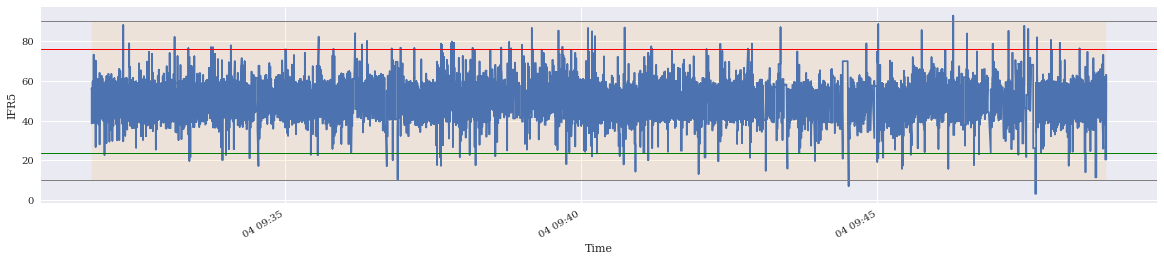

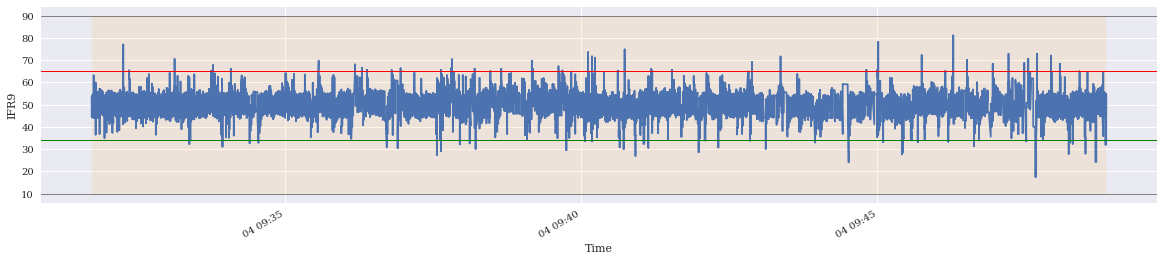

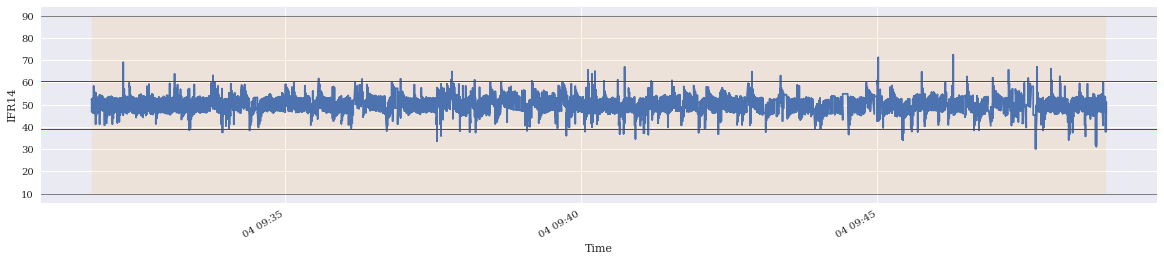

In [70]:
plt.rcParams['figure.figsize'] = (20,4)

per_ifr5 = percentil(df['IFR5'], up=99, down=1)
ax = df['IFR5'].plot()
ax.fill_between(df.index, 90, 10,facecolor= 'orange', alpha= 0.1)
plt.axhline(per_ifr5[0], color="red", lw=1.0)
plt.axhline(90.0, color="grey", lw=1.0)
plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_ifr5[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('IFR5')
plt.show()

per_ifr9 = percentil(df['IFR9'], up=99, down=1)
ax = df['IFR9'].plot()
ax.fill_between(df.index, 90, 10,facecolor= 'orange', alpha= 0.1)
plt.axhline(per_ifr9[0], color="red", lw=1.0)
plt.axhline(90.0, color="grey", lw=1.0)
plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_ifr9[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('IFR9')
plt.show()

per_ifr14 = percentil(df['IFR14'], up=99, down=1)
ax = df['IFR14'].plot()
ax.fill_between(df.index, 90, 10,facecolor= 'orange', alpha= 0.1)
plt.axhline(per_ifr14[0], color="red", lw=1.0)
plt.axhline(90.0, color="grey", lw=1.0)
plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_ifr14[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('IFR14')
plt.show()

In [66]:
df['IFR5'].describe()

count    10000.000000
mean        49.904419
std         11.268368
min          3.191445
25%         40.991156
50%         49.521132
75%         58.746355
max         92.852568
Name: IFR5, dtype: float64

In [68]:
df['IFR9'].describe()

count    10000.000000
mean        49.932145
std          6.521884
min         17.533454
25%         45.052302
50%         50.010422
75%         54.771269
max         81.119029
Name: IFR9, dtype: float64

In [69]:
df['IFR14'].describe()

count    10000.000000
mean        49.949802
std          4.488330
min         30.191584
25%         46.786704
50%         50.000102
75%         53.088480
max         72.459058
Name: IFR14, dtype: float64